In [0]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Lojistik Regresoyon

## Model

In [0]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

# Verinin olayı: verilen bilgilere göre kişinin diyabet hastası olup olmadığını tahmin eden bir model kurulabilir mi?

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [0]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

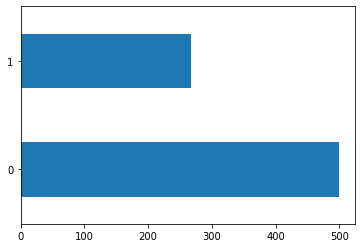

In [0]:
df["Outcome"].value_counts().plot.barh();

# verinin dağlımına bakarak test train ayrımını yapmalıyız.

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [0]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis =1)

In [0]:
# statsmodel ile 

loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 29 Apr 2020   Pseudo R-squ.:                 0.05922
Time:                        12:18:32   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [0]:
# sklearn ile

from sklearn.linear_model import  LogisticRegression

loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
loj_model.intercept_

array([-5.88653539])

In [0]:
loj_model.coef_

array([[ 1.17098692e-01,  2.83673379e-02, -1.69010912e-02,
         7.40100722e-04, -6.42594633e-04,  5.96676293e-02,
         6.83738130e-01,  7.20115615e-03]])

## Tahmin & Model Tuning

In [0]:
# lojistik regresyon modeli için optimize edilmesi gereken bir hiper parametre yoktur. Belki sadece sabit doğrulanabilir.
# ayrıca bağımlı değişkenin sınıflarının hangisi olduğundan emin olmak gerekir. yani 1  diyabetliyi ve 0 diyabetli olmayanı mı ifade ediyor bunu öğrenmeliyiz. 
# bu konularda genel olarak nadir ve ortaya çıkarılmak istenen sınıf 1 olur. diyabetli vs.

In [0]:
y_pred = loj_model.predict(X)

In [0]:
confusion_matrix(y, y_pred) # karmaşıklılık matrix idir. yani gerçekte 1 iken 1 denilenler gerçekte 1 iken 0 denilenler vs.

#              gercek     
#              1    0
# tahmin  1   448   52
#  tahmin 0   120   148
#

array([[448,  52],
       [120, 148]])

In [0]:
accuracy_score(y,y_pred) # 1 e yaklaştıkça daha iyidir. doğruluk oranıdır.

0.7760416666666666

In [0]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [0]:
loj_model.predict(X)[0:10] # burda 1 0 değerlerini döndü ama ben olasılık değerlerini istiyorsam??

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [0]:
loj_model.predict_proba(X)[0:10][:,0:2] # olasılıklarını aldım. soldaki 0.indexteki sütun  0 sınıfına ait olasılıklar sağdki 1. indexteki sütun 1sınıfına.

array([[0.35045457, 0.64954543],
       [0.91696714, 0.08303286],
       [0.22444087, 0.77555913],
       [0.92140042, 0.07859958],
       [0.16584029, 0.83415971],
       [0.79901575, 0.20098425],
       [0.88016705, 0.11983295],
       [0.27819813, 0.72180187],
       [0.3215012 , 0.6784988 ],
       [0.92264531, 0.07735469]])

In [0]:
y[0:10] 
# bakın mesela ilk değerim gerçekte 1 iken tahmin de de 1. o halde 0 olma olasılığı düşük olmalıdır ki proba ya bakarsak 34 e 64 değerinden bunu görürüz.

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [0]:
# şimdi predict_proba da verilen olasılıklar üzerinden eşik değeri belirleyerek bunnu 1 ve 0 a çevirebiliriz.

In [0]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [0]:
y_probs[0:10]

array([0.64954543, 0.08303286, 0.77555913, 0.07859958, 0.83415971,
       0.20098425, 0.11983295, 0.72180187, 0.6784988 , 0.07735469])

In [0]:
y_pred = [1 if i >0.5 else  0 for i in y_probs]

In [0]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

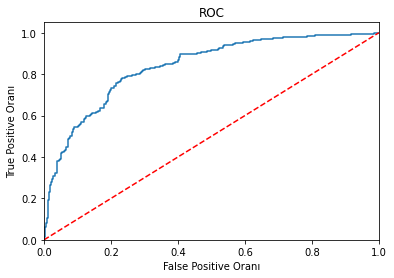

In [0]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# kırmızı çizgi hiç bir sınıflandırma modeli yapmasak oluşacak tahmin değerleridir. farkı ortaya koymak için bu çizgide uzaklaşmaya çalışırız
# mavi eğri ise bizim tahminlerimizdir.
# iki çizgi arasındaki alan hesabı, auc değeri denilen eğrinin altında kalan o alanı hesaplayarak bulunur. bize 0 ile 1 arasında değer verir.
# bu değer modelin başarısını açıklar.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [0]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = loj_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7619047619047619

In [0]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean() # en doğru sonuç elde edildi.

0.7704710144927536

In [0]:
# özünde yapılması gerekenler:
# modeli kur. 
# train test ayır.
# test üzerinden cv yap
# tüm cv den alınan accuracy değerlerinin ortalamasını al.

# Gaussian Naive Bayes

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
# bayes algoritmasında da yine optimize edilecek hiper parametre yok

In [0]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = nb_model.predict(X_test)

In [0]:
y_pred[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [0]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [0]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [0]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [0]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

# KNN


## Model & Tahmin

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = knn_model.predict(X_test)

In [0]:
 knn_model.predict_proba(X_test)[0:5]

array([[0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4]])

In [0]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [0]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [0]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
knn_cv.best_params_

{'n_neighbors': 11}

In [0]:
knn_cv.best_score_

0.748637316561845

In [0]:
knn_tuned = KNeighborsClassifier(11).fit(X_train, y_train)

In [0]:
 knn_tuned.score(X_test, y_test)

0.7316017316017316

In [0]:
y_pred = knn_tuned.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.7316017316017316

#SVC

## Model & Tahmin

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [0]:
y_pred = svm_model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [0]:
svc_params = {"C": np.arange(1,10)} # c deeğeri 0 olmamalı bu yüzzden 1 den başlatıyorum.

svc = SVC(kernel = "linear")

In [0]:
svc_cv_model = GridSearchCV(svc, svc_params, cv = 10, n_jobs = -1, verbose = 2)

In [0]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 21.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
svc_cv_model.best_params_

{'C': 5}

In [0]:
svc_tuned = SVC(kernel = "linear", C=5).fit(X_train, y_train)

In [0]:
y_pred = svc_tuned.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC

## Model & Tahmin

In [0]:
# rbf radial bases fonksiyonunu ifade ediyor.

In [0]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [0]:
y_pred = svc_model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [0]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    9.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
svc_cv_model.best_params_

{'C': 10, 'gamma': 0.0001}

In [0]:
svc_tuned = SVC(C=10, gamma = 0.0001).fit(X_train, y_train)

In [0]:
y_pred = svc_tuned.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağı

## Model & Tahmin

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
from  sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlpc = MLPClassifier().fit(X_train_scaled,y_train)

In [0]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [0]:
mlpc

# hidden_layer_size ile katman ve hücre sayısını vermeliyiz.
# activation da relu ve logistic i deneyeceğiz
# solver ağırlıkların optimizasyonunu yapmak için kullanılır.
# learning_rate ağırlık güncellemesi için yöntemi belirler
# alpha ceza parametresidir.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [0]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs = -1, verbose=2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 13.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [0]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 1e-05,
 'hidden_layer_sizes': (10, 10, 10),
 'solver': 'adam'}

In [0]:
mlpc_tuned = MLPClassifier(activation = 'relu',alpha = 0,hidden_layer_sizes=(10,10,10) ,
                           solver= 'adam' )

In [0]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

## CART - Model & Tahmin

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]  # örnek amaçlı az değişkenle bir bakalım.
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
! pip install skompiler
from skompiler import skompile  # karar kuralını almak için

In [0]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= 
    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1 if 
    x[5] <= 28.149999618530273 else 0) if x[5] <= 30.300000190734863 else 1 if
    x[5] <= 32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <=
    0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if
    x[7] <= 28.5 else (1 if x[7] <= 29.5 else (1 if x[6] <= 
    0.4359999895095825 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (1 if x[7] <= 70.5 else 0) if x[1] <= 135.0 else 0) if x[5] <=
    26.9499

In [0]:
X = [3]

In [0]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

0

In [0]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [0]:
?cart_model
# max depth karmaşıklığı kontorol eden bir prametredir.
# min_sample_split: bölünme için gerekli olan minimum örnek sayısı
# min_sample_leaf : leaf node denilen en son  nodelarda barındırılacak eleman sayısını ifade eder.

In [0]:
cart_grid = {"max_depth": list(range(1,10)),
             "min_sample_split": range(2,50)}
            

In [0]:
cart = DecisionTreeClassifier()
cart_cv_model = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=2).fit(X_test, y_train)

In [0]:
cart_tuned =DecisionTreeClassifier(max_depth=5, min_samples_split=19)

In [0]:
cart_tuned=cart_tuned.fit(X_train, y_train)

In [0]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forest

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]  # örnek amaçlı az değişkenle bir bakalım.
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [0]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [0]:
?rf_model

# en önemli parametrler ağaç sayısı (n_estimators) ve 
# bölünmelerde göz önünde bulunacak değişken sayısı (max_features)
# min_sample_split

In [0]:
rf_params = {"max_depth": [2,3,5,8,10],
             "max_features":[2,5,8],
             "n_estimators":[10,500,1000],
             "min_samples_split":[2,5,10]}

In [0]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [0]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 16.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [0]:

rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 10,
 'n_estimators': 10}

In [0]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 2,
                                  min_samples_split = 10,
                                  n_estimators = 10)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [0]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

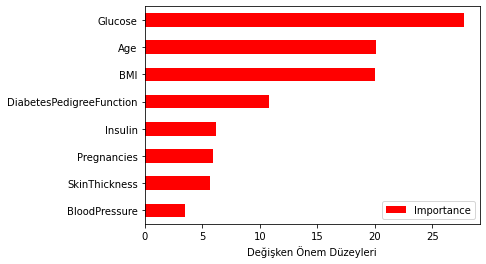

In [0]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Graient Boosting Machines

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]  # örnek amaçlı az değişkenle bir bakalım.
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, )

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [0]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7532467532467533

## Model Tuning

In [0]:
gbm_model

# leaning rate önemli
# n_estimators ağaç sayısını deneyeceğiz
# subsamble çok fazla değişken olduğunda mantıklı olbilir ama şu an 1 olarak yani hespini alacağız
# min_sapmples
# min_samples_leaf
# min_sample_split
# max_depth

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [0]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs= -1, verbose = 2)

In [0]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [0]:
gbm_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [0]:
gbm_tuned = GradientBoostingClassifier(learning_rate =  0.1,
 max_depth = 3,
 min_samples_split = 10,
 n_estimators = 100).fit(X_train, y_train)

In [0]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7532467532467533

# XGBoost

In [0]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [0]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [0]:
xgb_model
# max_depth
# learning_rate
# n_estimators(iterasyon sayısı olarak dda geçebilir)
# colsamble_bytree belki

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [0]:
xgb = GradientBoostingClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs = -1, verbose = 2)

In [0]:
xgb_cv_model.fit(X_train, y_train)

In [0]:
xgb_cv_model.best_params_

In [0]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [0]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [0]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Light GBM

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [0]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

## Model  Tuning

In [0]:
lgbm_model
# boosting_type
# max_depth
# n_estimators
# min_child_samples
# subsamble


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [0]:
lgbm = LGBMClassifier()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10,n_jobs = -1, verbose = 2)


In [0]:
lgbm_tuned =lgbm_cv_model.fit(X_train, y_train)

In [0]:
lgbm_tuned.best_params_

In [0]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [0]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [0]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# CatBoosting

In [0]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 64.8MB 64kB/s 


In [0]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [0]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [0]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [0]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [0]:
catb_cv_model.best_params_

In [0]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6616627	total: 1.65ms	remaining: 328ms
1:	learn: 0.6400771	total: 3.79ms	remaining: 375ms
2:	learn: 0.6218613	total: 5.18ms	remaining: 340ms
3:	learn: 0.6091958	total: 6.94ms	remaining: 340ms
4:	learn: 0.5938260	total: 10.3ms	remaining: 403ms
5:	learn: 0.5777363	total: 11.6ms	remaining: 375ms
6:	learn: 0.5641154	total: 12.8ms	remaining: 352ms
7:	learn: 0.5465291	total: 14ms	remaining: 335ms
8:	learn: 0.5343176	total: 15.2ms	remaining: 323ms
9:	learn: 0.5253371	total: 16.4ms	remaining: 311ms
10:	learn: 0.5152429	total: 17.5ms	remaining: 300ms
11:	learn: 0.5039035	total: 18.6ms	remaining: 291ms
12:	learn: 0.4940833	total: 19.8ms	remaining: 285ms
13:	learn: 0.4869167	total: 21ms	remaining: 279ms
14:	learn: 0.4800142	total: 22.2ms	remaining: 274ms
15:	learn: 0.4744378	total: 23.4ms	remaining: 269ms
16:	learn: 0.4684316	total: 24.6ms	remaining: 265ms
17:	learn: 0.4619170	total: 25.8ms	remaining: 261ms
18:	learn: 0.4560716	total: 27ms	remaining: 257ms
19:	learn: 0.4520436	total: 

In [0]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [0]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))